In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms, datasets

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

False
0


In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
trainset = datasets.MNIST(root='/scratch/yardima/data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='/scratch/yardima/data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                          shuffle=False, num_workers=2)

Processing...
Done!


tensor([8, 6, 8, 2, 5, 8, 0, 6])


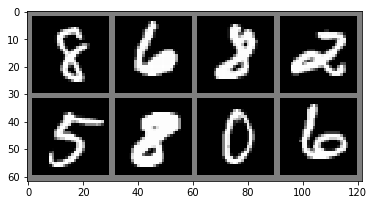

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/yardima/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/ho

In [6]:
dataiter = iter(trainloader)
i, l = dataiter.next()

g = torchvision.utils.make_grid(i, nrow=4)

g = g / 2 + 0.5     # unnormalize
npimg = g.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

print(l)

## k-NN baseline performance 

In [7]:
trainX_numpy = trainset.train_data.data.numpy()
trainX_numpy = trainX_numpy.reshape((-1, 28 * 28))

trainy_numpy = trainset.train_labels.data.numpy()

In [8]:
testX_numpy = testset.test_data.data.numpy()
testX_numpy = testX_numpy.reshape((-1, 28 * 28))

testy_numpy = testset.test_labels.data.numpy()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

nn1_classifier = KNeighborsClassifier(n_neighbors=1, n_jobs=8)
nn3_classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=8)
nn5_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=8)

In [11]:
nn1_classifier.fit(trainX_numpy, trainy_numpy)
nn3_classifier.fit(trainX_numpy, trainy_numpy)
nn5_classifier.fit(trainX_numpy, trainy_numpy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
%%time
pred1 = nn1_classifier.predict(testX_numpy)

CPU times: user 19min 21s, sys: 24 ms, total: 19min 21s
Wall time: 9min 41s


In [13]:
%%time
pred3 = nn3_classifier.predict(testX_numpy)

CPU times: user 18min 58s, sys: 16 ms, total: 18min 58s
Wall time: 9min 30s


In [14]:
%%time
pred5 = nn5_classifier.predict(testX_numpy)

CPU times: user 19min 14s, sys: 40 ms, total: 19min 14s
Wall time: 9min 38s


In [15]:
print("k-NN classification performance on MNIST test set (k=1)")
print(np.mean(pred1 == testy_numpy))

k-NN classification performance on MNIST test set (k=1)
0.9691


In [16]:
print("k-NN classification performance on MNIST test set (k=3)")
print(np.mean(pred3 == testy_numpy))

k-NN classification performance on MNIST test set (k=3)
0.9705


In [17]:
print("k-NN classification performance on MNIST test set (k=5)")
print(np.mean(pred5 == testy_numpy))

k-NN classification performance on MNIST test set (k=5)
0.9688
